In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_ui import *
%matplotlib inline

In [194]:
df = pd.read_csv('train.csv')

In [195]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [196]:
df.shape

(891, 12)

## Exploratory Data Analysis

In [197]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [199]:
df.loc[df['Sex']=="male"].shape[0]

577

In [200]:
df.loc[df['Sex']=="female"].shape[0]

314

In [201]:
df.loc[df['Survived']==0].shape[0]

549

In [202]:
df.loc[df['Survived']==1].shape[0]

342

### Missing Values

In [203]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Checking Missing Values using Seaborn

<AxesSubplot:>

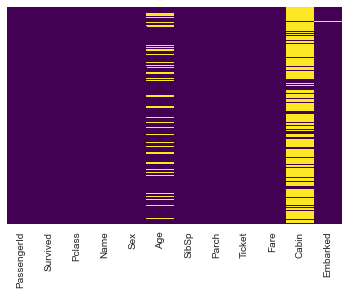

In [204]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Roughly 20 Percent of age data is missing. The proportion of missing age is likely small enough for reasonable replacement. but
in the case of Cabin around 80 Percent of data is missig which basically is too much. So, there is no option for retaining the
data. Two options are there, either we can drop the Cabin feature or we can convert it into another feature like Cabin known 
1 or 0

<AxesSubplot:xlabel='Sex', ylabel='count'>

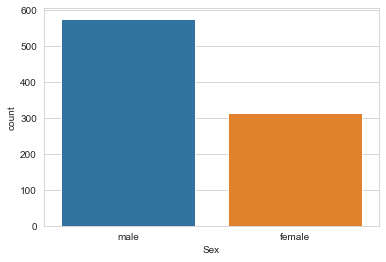

In [205]:
sns.countplot('Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

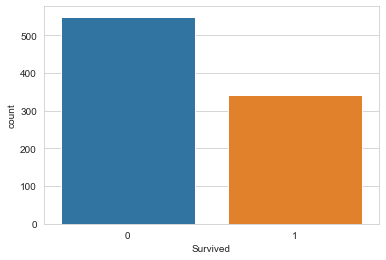

In [206]:
sns.set_style('whitegrid')
sns.countplot('Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

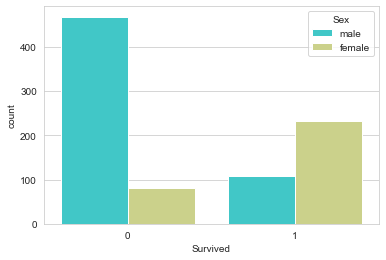

In [207]:
sns.countplot(data=df, x='Survived', hue='Sex', palette='rainbow')

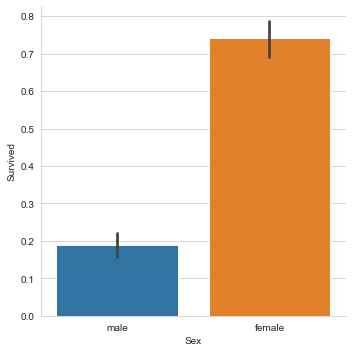

In [208]:
sns.catplot(data=df, x='Sex', y='Survived', kind='bar')

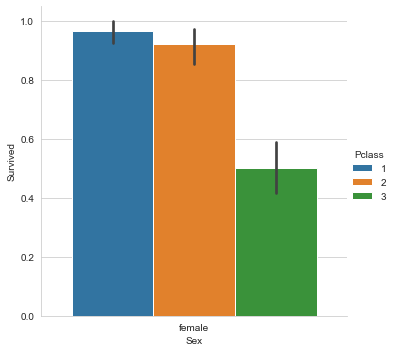

In [209]:
sns.catplot(data=df.loc[df['Sex']=='female'], x='Sex', y='Survived', hue= 'Pclass', kind='bar')

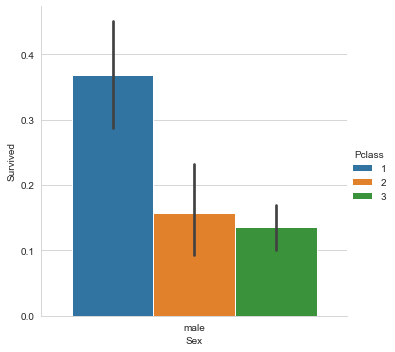

In [210]:
sns.catplot(data=df.loc[df['Sex']=='male'], x='Sex', y='Survived', hue= 'Pclass', kind='bar')

<AxesSubplot:xlabel='Sex', ylabel='count'>

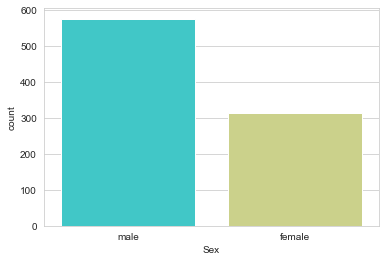

In [211]:
sns.countplot(data=df, x="Sex", palette="rainbow")

<AxesSubplot:xlabel='Survived', ylabel='count'>

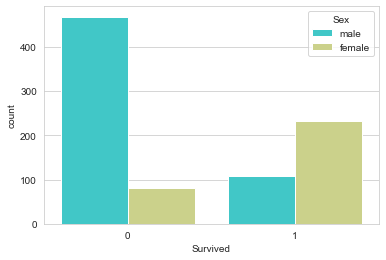

In [212]:
sns.countplot(data=df, x="Survived", hue='Sex', palette="rainbow")

<AxesSubplot:xlabel='Survived', ylabel='count'>

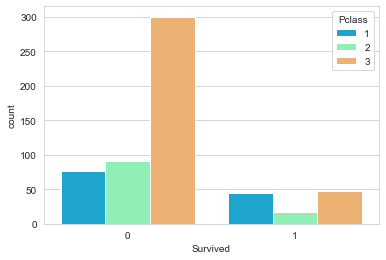

In [213]:
sns.countplot(data=df.loc[df['Sex']=='male'], x="Survived", hue='Pclass', palette="rainbow")

<AxesSubplot:xlabel='Survived', ylabel='count'>

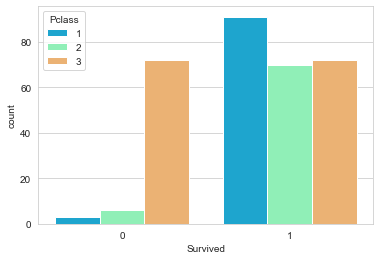

In [214]:
sns.countplot(data=df.loc[df['Sex']=='female'], x="Survived", hue='Pclass', palette="rainbow")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

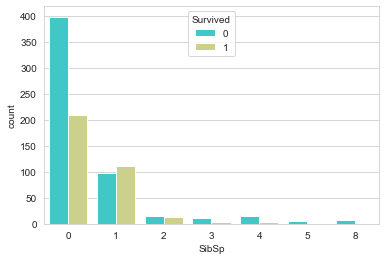

In [215]:
sns.countplot(data=df, x='SibSp', hue='Survived', palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

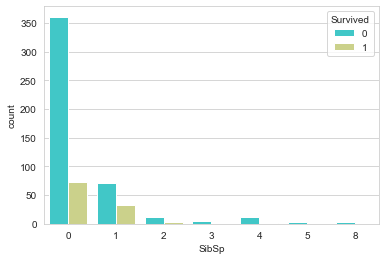

In [216]:
sns.countplot(data=df.loc[df['Sex']=='male'], x='SibSp', hue='Survived', palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

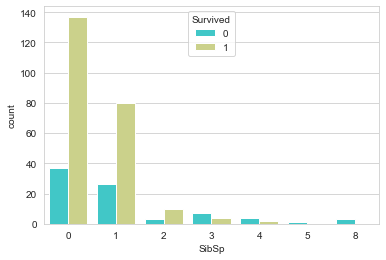

In [217]:
sns.countplot(data=df.loc[df['Sex']=='female'], x='SibSp', hue='Survived', palette='rainbow')

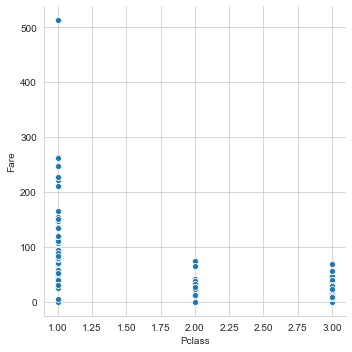

In [218]:
sns.relplot(data=df, x='Pclass', y='Fare')

C:\Users\ayush\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\ayush\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\ayush\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\ayush\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\ayush\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



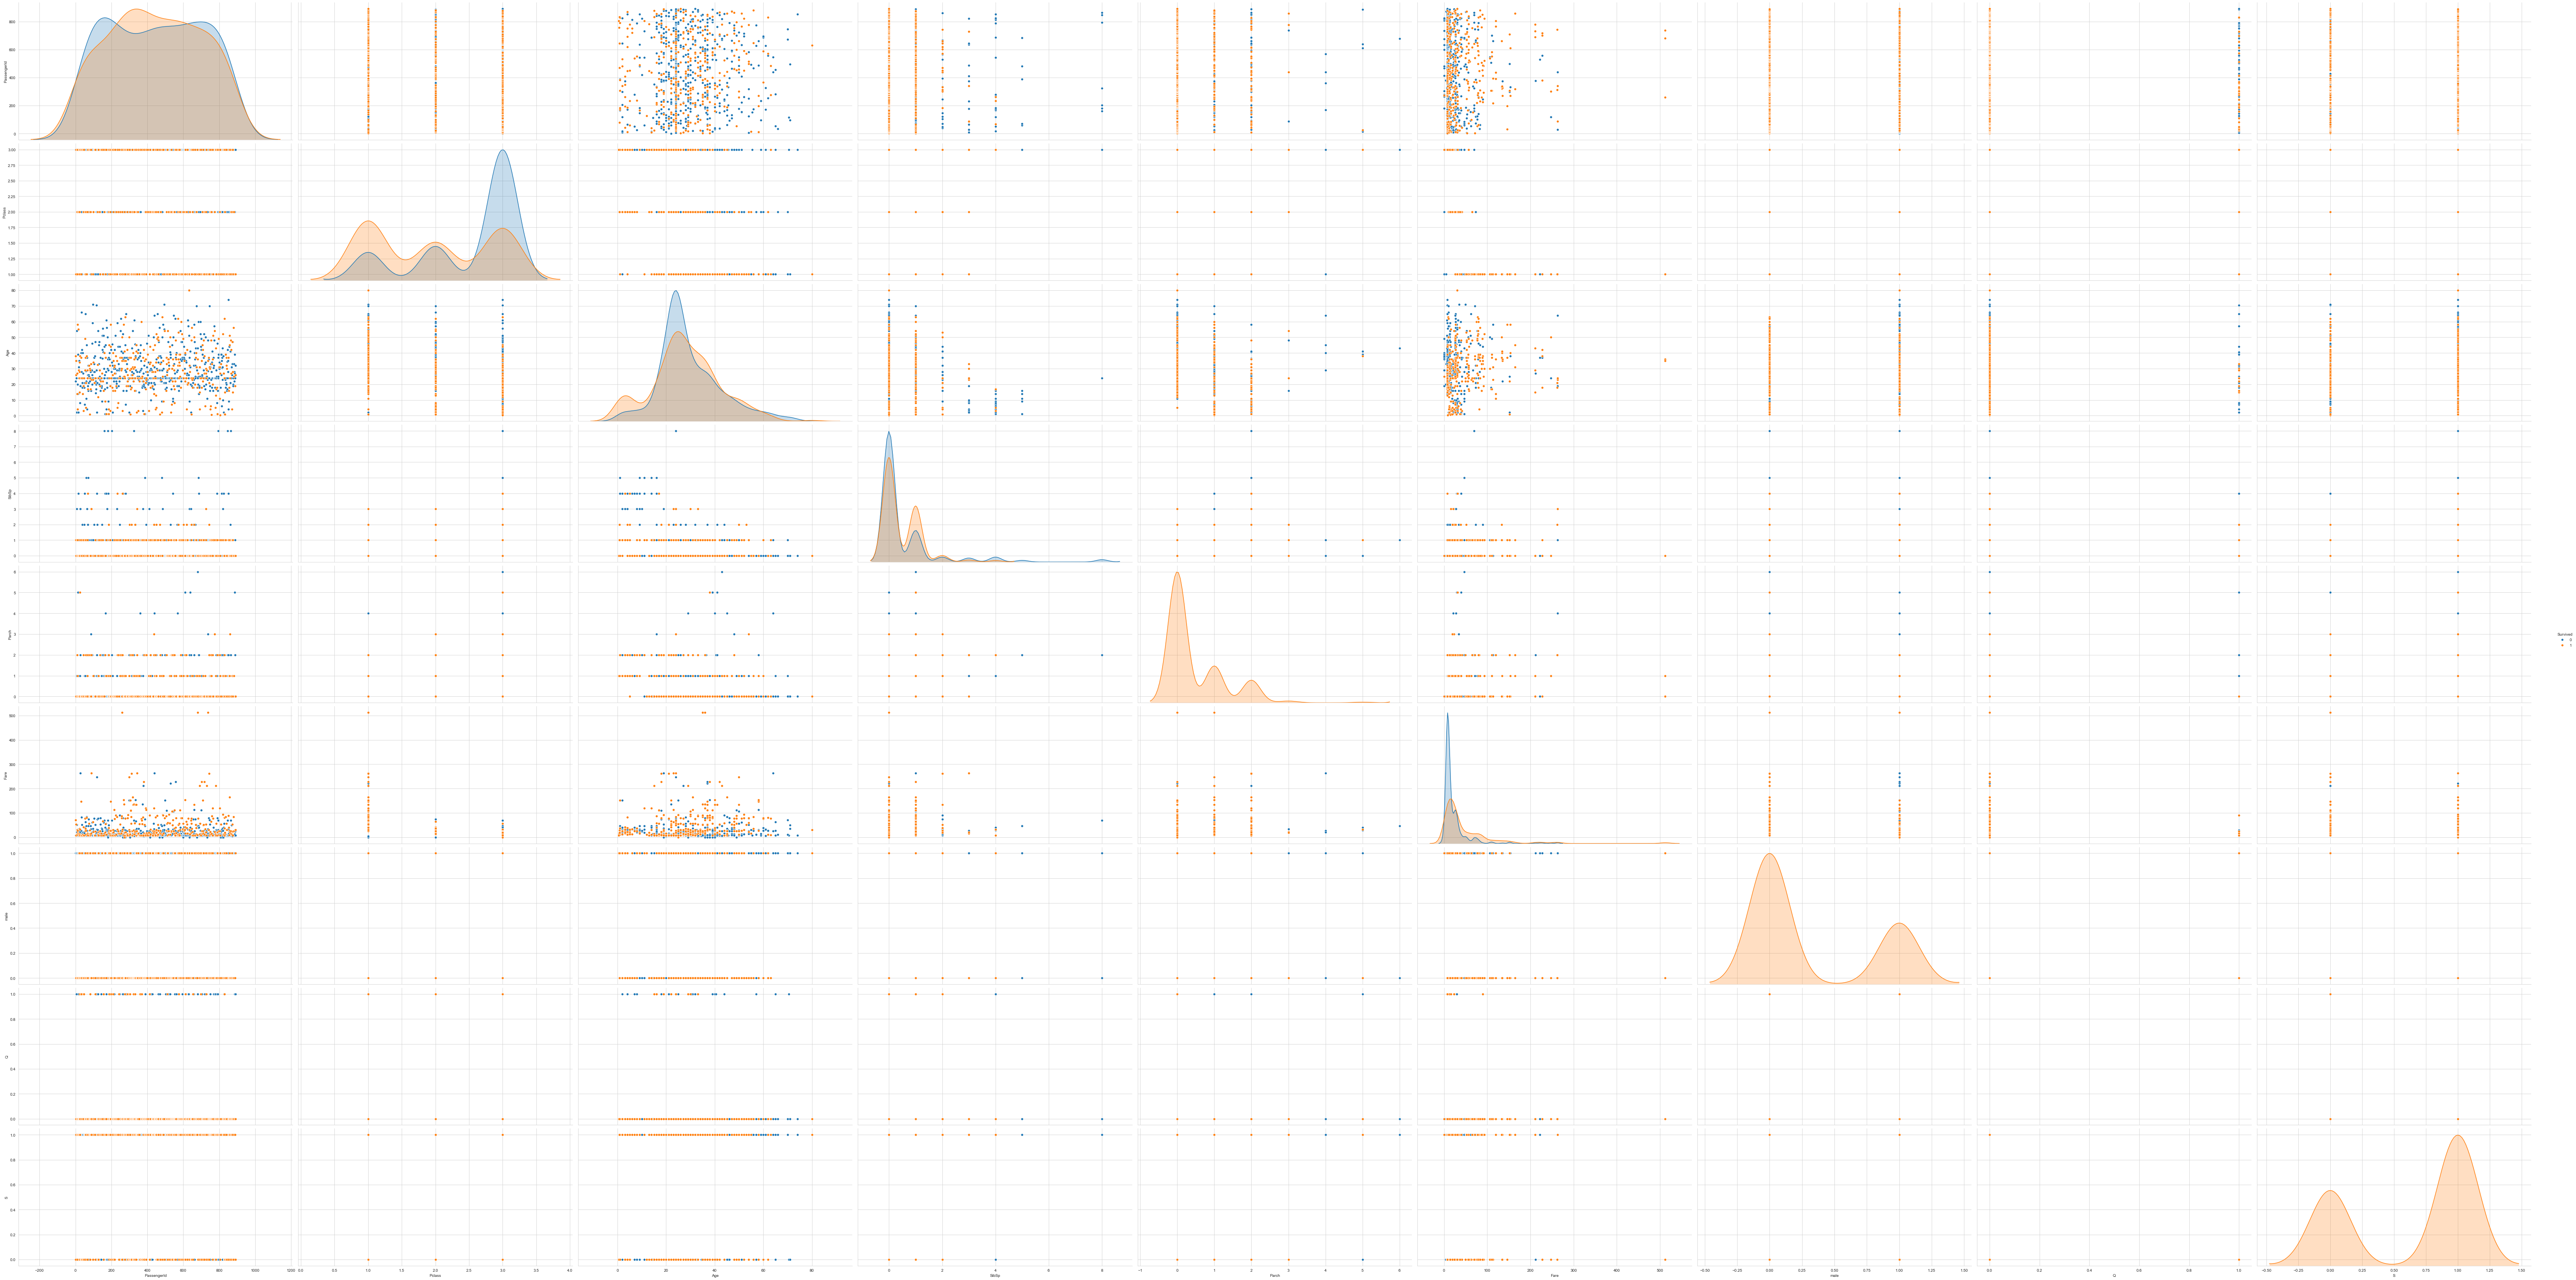

In [265]:
sns.pairplot(df,hue='Survived',height=5, aspect=2)

In [219]:
## Mean Ticket Price for Class 1 , and 3

In [220]:
df.loc[df['Pclass']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,216.0,461.597222,246.737616,2.00,270.75000,472.0000,670.5,890.0000
Survived,216.0,0.629630,0.484026,0.00,0.00000,1.0000,1.0,1.0000
Pclass,216.0,1.000000,0.000000,1.00,1.00000,1.0000,1.0,1.0000
Age,186.0,38.233441,14.802856,0.92,27.00000,37.0000,49.0,80.0000
SibSp,216.0,0.416667,0.611898,0.00,0.00000,0.0000,1.0,3.0000
Parch,216.0,0.356481,0.693997,0.00,0.00000,0.0000,0.0,4.0000
Fare,216.0,84.154687,78.380373,0.00,30.92395,60.2875,93.5,512.3292


In [221]:
df.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [222]:
df.loc[(df['Age']>=0) & (df['Age']<12)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


In [223]:
## Binning Age Groups

In [224]:
bins = [0, 10, 18, 30, 45, 60, 80]
labels = ['Children', 'Young_Teens', 'Young_Adults', 'Mid_Adults', 'Old_Adults', 'Senior_Citizens']
df['Age_by_category'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [225]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young_Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mid_Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young_Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mid_Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mid_Adults


<AxesSubplot:xlabel='Survived', ylabel='count'>

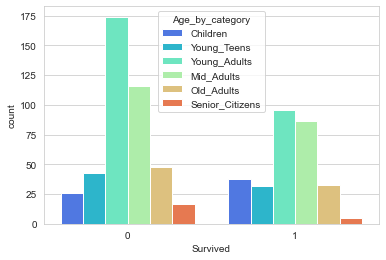

In [226]:
sns.countplot(data=df, x='Survived', hue='Age_by_category', palette='rainbow')

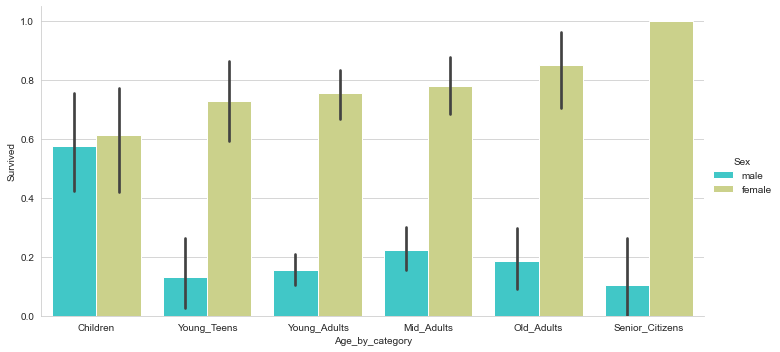

In [227]:
sns.catplot(data=df, x='Age_by_category', y='Survived', hue='Sex', kind='bar', palette='rainbow', height= 5, aspect=2)

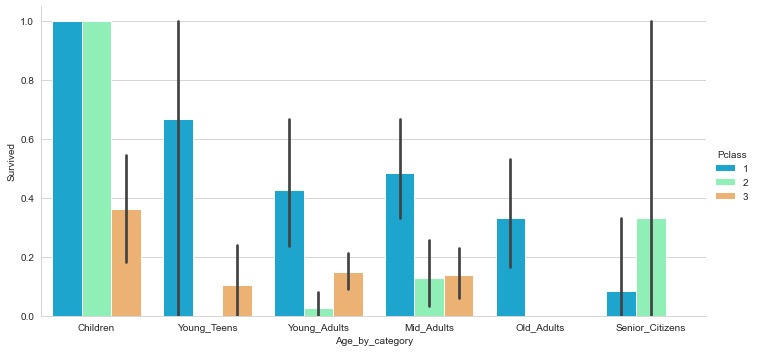

In [228]:
sns.catplot(data=df.loc[df['Sex']=='male'], x='Age_by_category', y='Survived', hue='Pclass', kind='bar', palette='rainbow', height= 5, aspect=2)

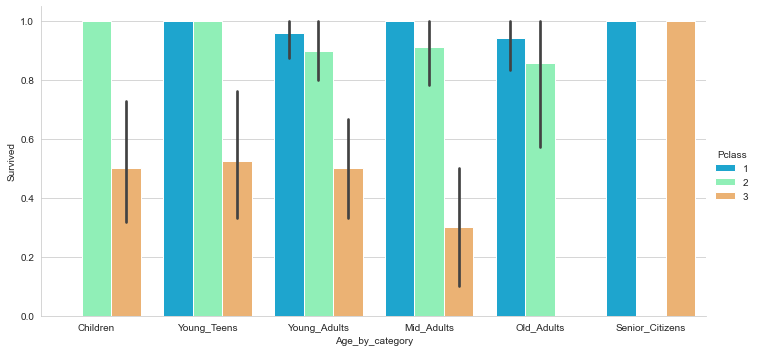

In [229]:
sns.catplot(data=df.loc[df['Sex']=='female'], x='Age_by_category', y='Survived', hue='Pclass', kind='bar', palette='rainbow', height= 5, aspect=2)

In [230]:
df.loc[(df['Sex']=='female') & (df['Pclass']==1) & (df['Age_by_category']=='Children')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_category
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,Children


<AxesSubplot:xlabel='Age'>

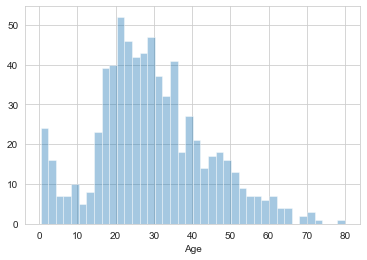

In [231]:
sns.distplot(df['Age'].dropna(), kde=False, bins=40)

## Pandas UI

In [232]:
pandas_ui('train.csv')

## Data Cleaning

Here we will fill the missing age instead of just dropping the missing age column. One way is by filling in the mean age 
of all the passengers(Inputing). However we can be smarter about this and check the average age by Passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

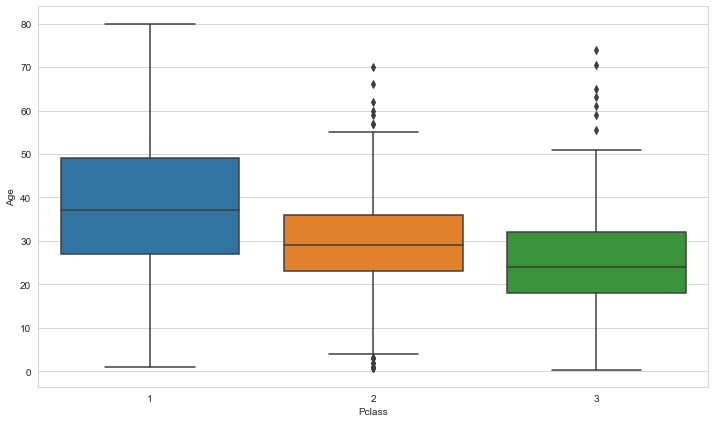

In [233]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df,x='Pclass',y='Age')

Older People being wealthier are in higher classes which makes sense

In [234]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [235]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

In [236]:
bins = [0, 10, 18, 30, 45, 60, 80]
labels = ['Children', 'Young_Teens', 'Young_Adults', 'Mid_Adults', 'Old_Adults', 'Senior_Citizens']
df['Age_by_category'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [237]:
df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Age_by_category      0
dtype: int64

<AxesSubplot:>

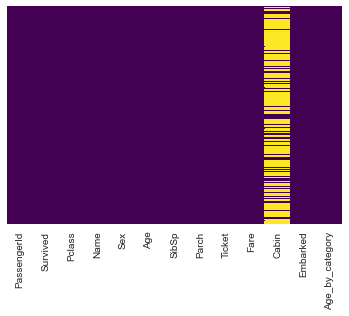

In [238]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [239]:
df.drop('Cabin',axis=1,inplace=True)

In [240]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_by_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young_Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mid_Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young_Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mid_Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mid_Adults


## Converting Categotical Features

In [241]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [242]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [243]:
df.drop(['Sex','Embarked','Name','Ticket','Age_by_category'],axis=1, inplace=True)

In [244]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [248]:
df = pd.concat([df,sex,embark],axis=1)

In [249]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Train Test Split

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.30, random_state= 42)

## Training and Predicting

In [254]:
from sklearn.linear_model import LogisticRegression

In [255]:
logmodel= LogisticRegression()

In [256]:
logmodel.fit(X_train,y_train)

C:\Users\ayush\anaconda3\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
predictions = logmodel.predict(X_test)

In [261]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [259]:
accuracy = confusion_matrix(y_test, predictions)

In [260]:
accuracy

array([[138,  19],
       [ 35,  76]], dtype=int64)

In [262]:
accuracy_scoree = accuracy_score(y_test, predictions)

In [263]:
accuracy_scoree

0.7985074626865671

NOTE: This is Intended just for introduction to Exploratory Data Analysis. Feature Scaling and Feature Reduction will be done
in other workbook